In [ ]:
#####
#By: Abishek Ganesh
#Refs: Dr. Gene Code for Data Analysis
###

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [11]:
inp_data = pd.read_csv('movie_metadata.csv')

In [12]:
inp_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [13]:
inp_data.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [14]:
genres = inp_data.genres.values

In [15]:
counts=[]
for genre in genres:
    counts.extend(genre.lower().split("|"))
print len(counts), len(set(counts))

14504 26


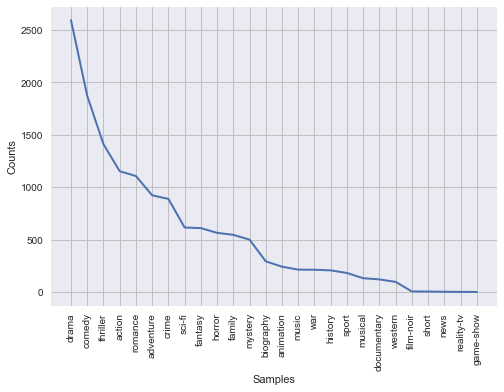

In [16]:
genre_dist=nltk.FreqDist(counts)
genre_dist.plot()
plt.show()

In [18]:
genre_words=""
for i in genre_dist.keys(): genre_words+=' '+i

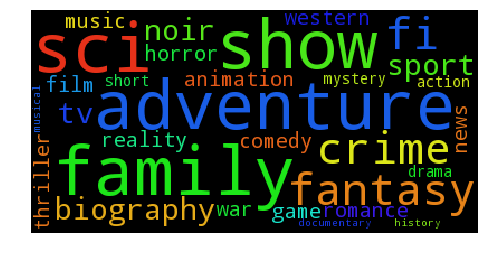

In [19]:
wordcloud = WordCloud(max_font_size=60).generate(genre_words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [20]:
plot_keywords = inp_data.dropna().plot_keywords.values

In [21]:
plot_keywords

array(['avatar|future|marine|native|paraplegic',
       'goddess|marriage ceremony|marriage proposal|pirate|singapore',
       'bomb|espionage|sequel|spy|terrorist', ...,
       'changing the future|independent film|invention|nonlinear timeline|time travel',
       'assassin|death|guitar|gun|mariachi',
       'actress name in title|crush|date|four word title|video camera'], dtype=object)

In [22]:
counts_plot=[]
for key in plot_keywords:
    counts_plot.extend(key.lower().replace("|", " ").split())
print len(counts_plot), len(set(counts_plot))

28607 5363


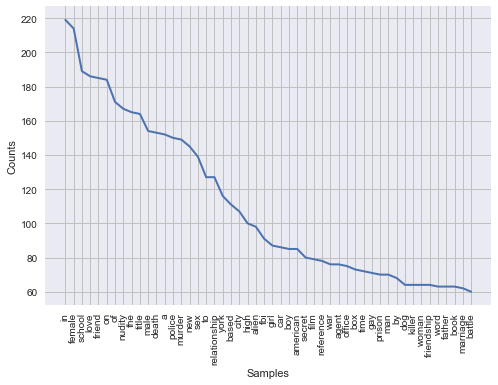

In [23]:
freqdist = nltk.FreqDist(counts_plot)
freqdist.plot(50)
plt.show()

In [24]:
from nltk.corpus import stopwords
stopwords = open('stopwords.txt').read().split()
print len(stopwords)

127


In [25]:
for stopword in stopwords:
    if stopword in freqdist:
        freqdist.pop(stopword)


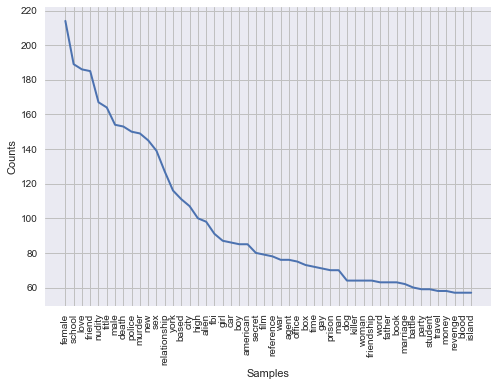

In [26]:
freqdist.plot(50)
plt.show()

In [27]:
words=""
for word in freqdist.keys(): words+=' '+word

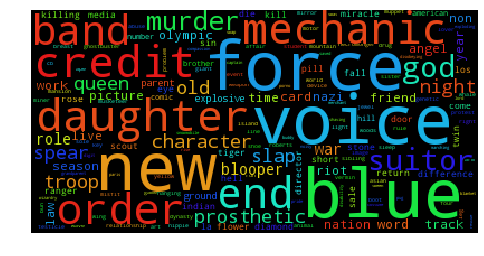

In [28]:
wordcloud = WordCloud(max_font_size=60).generate(words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()